# EDA and Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/alter_psychologists_list_anonymous_dataset.csv", index_col=0)

In [3]:
df.sample(5).T

,73,77,630,456,683
city,Москва,Москва,Дубай,Сочи,Санкт-Петербург
experience,9,7,7,2,14
private_experience,0,0,7,3,13
alter_experience,0,0,3,0,3
sex,F,F,F,F,F
age,43.0,45.0,44.0,35.0,NaN
marital_status,NaN,single,married,married,NaN
has_children,True,False,NaN,True,NaN
working_with.family,False,False,False,False,False
working_with.adults,True,True,True,True,True


In [4]:
#Датасет на 751 объект, есть nan.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 750
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    751 non-null    object 
 1   experience              751 non-null    int64  
 2   private_experience      751 non-null    int64  
 3   alter_experience        751 non-null    int64  
 4   sex                     743 non-null    object 
 5   age                     715 non-null    float64
 6   marital_status          640 non-null    object 
 7   has_children            630 non-null    object 
 8   working_with.family     751 non-null    bool   
 9   working_with.adults     751 non-null    bool   
 10  working_with.lgbt       751 non-null    bool   
 11  working_with.believer   751 non-null    bool   
 12  working_with.fem        751 non-null    bool   
 13  working_with.foreigner  751 non-null    bool   
 14  working_with.elderly    751 non-null    bool   

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

city                        0
experience                  0
private_experience          0
alter_experience            0
sex                         8
age                        36
marital_status            111
has_children              121
working_with.family         0
working_with.adults         0
working_with.lgbt           0
working_with.believer       0
working_with.fem            0
working_with.foreigner      0
working_with.elderly        0
education_count             0
competences_count           0
methods_count               0
expertise_count             0
features_of_work_count      0
price                       0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,751.0,7.930759,4.900394,1.0,4.0,7.0,10.0,30.0
private_experience,751.0,5.532623,5.664268,0.0,0.0,5.0,9.0,34.0
alter_experience,751.0,1.154461,1.237246,0.0,0.0,1.0,2.0,5.0
age,715.0,39.216783,8.030352,24.0,33.0,38.0,44.0,72.0
education_count,751.0,7.110519,4.241985,1.0,4.0,6.0,9.0,30.0
competences_count,751.0,5.376831,3.567325,2.0,4.0,4.0,4.0,31.0
methods_count,751.0,1.707057,0.885101,1.0,1.0,1.0,2.0,7.0
expertise_count,751.0,3.115846,1.887828,0.0,2.0,3.0,5.0,9.0
features_of_work_count,751.0,11.841545,3.638341,0.0,9.0,12.0,14.0,22.0
price,751.0,4134.908123,1608.448598,1500.0,3000.0,4000.0,5000.0,20000.0


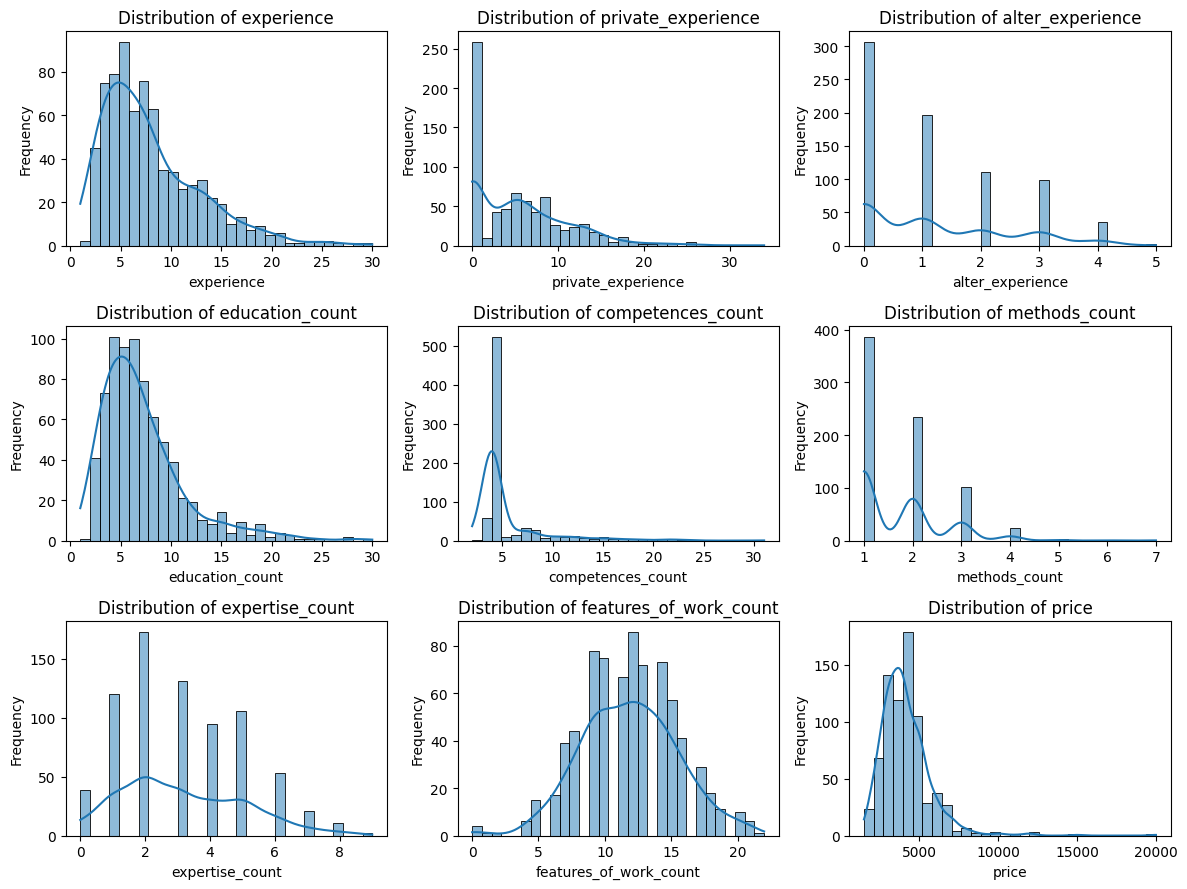

In [8]:
# Выбираем некоторые признаки для оценки распределения. Смотрим гистограмму.
numeric_features = ['experience', 'private_experience', 'alter_experience', 'education_count',\
                    'competences_count', 'methods_count', 'expertise_count', 'features_of_work_count', 'price' ]

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('distribution_plots.png')
plt.show()


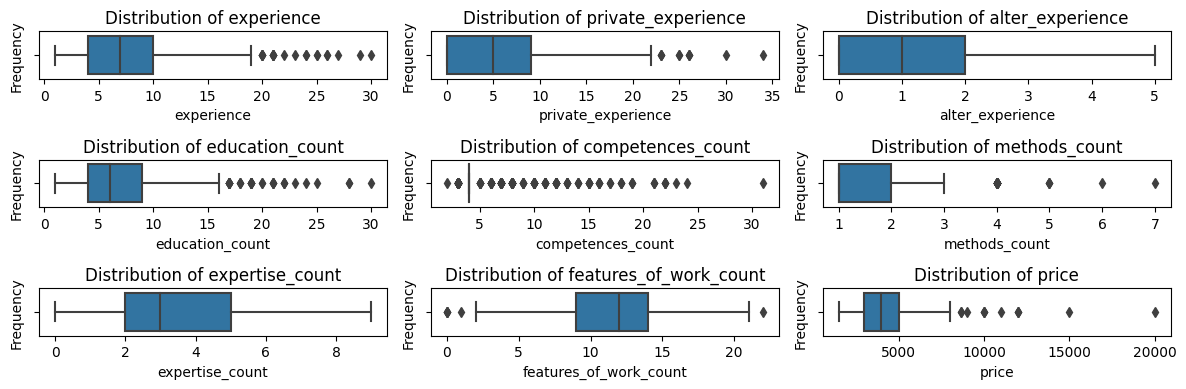

In [9]:
# Можно считать резкие значения за выброс. Строим boxplot.
numeric_features = ['experience', 'private_experience', 'alter_experience', 'education_count',\
                    'competences_count', 'methods_count', 'expertise_count', 'features_of_work_count', 'price' ]

fig, axes = plt.subplots(3, 3, figsize=(12, 4))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

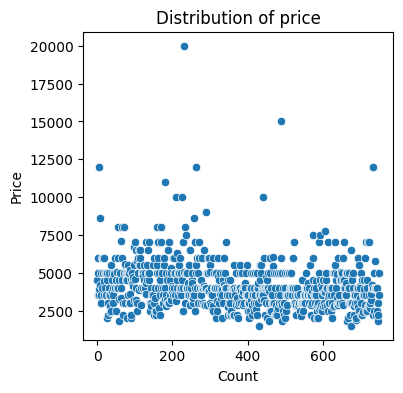

In [10]:
# Смотрим диаграмму рассеяния в "price"
plt.figure(figsize=(4, 4))
sns.scatterplot(df['price'])
plt.xlabel('Count')
plt.ylabel('Price')
plt.title('Distribution of price')
plt.savefig('distribution_of_price_scatterplot.png')
plt.show()

In [11]:
# Убираем выбросы в "price" все выше 8_000
# df = df[df['price'] <= 8_000]

In [12]:
# Много городов с малым количеством профилей, можно объеденить
df.city.value_counts()

city
Москва             363
Санкт-Петербург    198
Краснодар           13
Самара              10
Калининград         10
                  ... 
Вологда              1
Эйндховен            1
Йошкар-Ола           1
Кострома             1
Ангарск              1
Name: count, Length: 83, dtype: int64

In [13]:
df['city'] = df['city'].apply(lambda x: 'Другой' if x not in ['Москва', 'Санкт-Петербург'] else x)

In [14]:
df.pivot_table(
    values=['price'], 
    index=['city', 'sex'],
    aggfunc='median',
)

price
city            sex       
Другой          F     3000
                M     3600
Москва          F     4100
                M     4000
Санкт-Петербург F     3500
                M     4000

In [15]:
pd.pivot_table(df, values='price', index=['city', 'experience', 'sex', 'marital_status'], aggfunc='median')

price
city            experience sex marital_status       
Другой          2          F   married          2200
                               single           2100
                           M   married          2200
                               single           2850
                3          F   married          3000
...                                              ...
Санкт-Петербург 20         M   married          3000
                21         F   married          4560
                           M   married          5000
                23         F   married          2800
                27         F   married          4000

[163 rows x 1 columns]

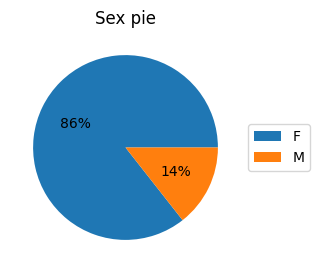

In [16]:
# Получилось что в датасете женщин дольшинство 
city_counts = df['sex'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(city_counts, autopct='%.0f%%')
plt.title('Sex pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

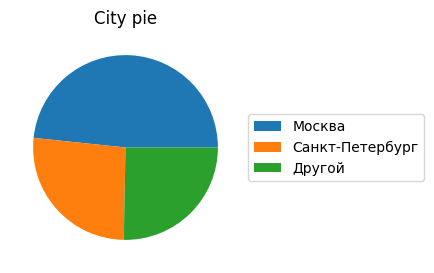

In [17]:
city_counts = df['city'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(city_counts)
plt.title('City pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

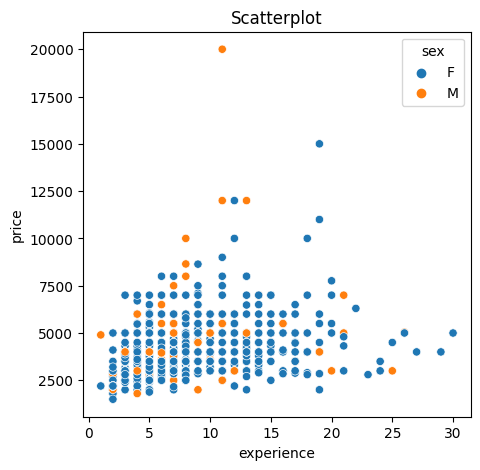

In [18]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x="experience", y="price", hue="sex")
plt.title('Scatterplot')
plt.savefig('Scatterplot_experience_price.png')
plt.show()

### Оптимизируем датасет по памяти 

In [19]:
df_array = df.replace({False: 0, True: 1, "F": 1, "M": 0, "married": 1, "single": 0})

In [20]:
df_array["working_with.family"] = df_array["working_with.family"].astype(np.int8)
df_array["working_with.adults"] = df_array["working_with.adults"].astype(np.int8)
df_array["working_with.lgbt"] = df_array["working_with.lgbt"].astype(np.int8)
df_array["working_with.believer"] = df_array["working_with.believer"].astype(np.int8)
df_array["working_with.fem"] = df_array["working_with.fem"].astype(np.int8)
df_array["working_with.foreigner"] = df_array["working_with.foreigner"].astype(np.int8)
df_array["working_with.elderly"] = df_array["working_with.elderly"].astype(np.int8)

df_array["education_count"] = df_array["education_count"].astype(np.int16)
df_array["competences_count"] = df_array["competences_count"].astype(np.int16)
df_array["methods_count"] = df_array["methods_count"].astype(np.int16)
df_array["expertise_count"] = df_array["expertise_count"].astype(np.int16)

df_array["experience"] = df_array["experience"].astype(np.int16)
df_array["private_experience"] = df_array["private_experience"].astype(np.int16)
df_array["alter_experience"] = df_array["alter_experience"].astype(np.int16)
df_array["features_of_work_count"] = df_array["features_of_work_count"].astype(np.int16)

df_array["age"] = df_array["age"].astype(np.float16)
df_array["sex"] = df_array["sex"].astype(np.float16)
df_array["marital_status"] = df_array["marital_status"].astype(np.float16)
df_array["has_children"] = df_array["has_children"].astype(np.float16)

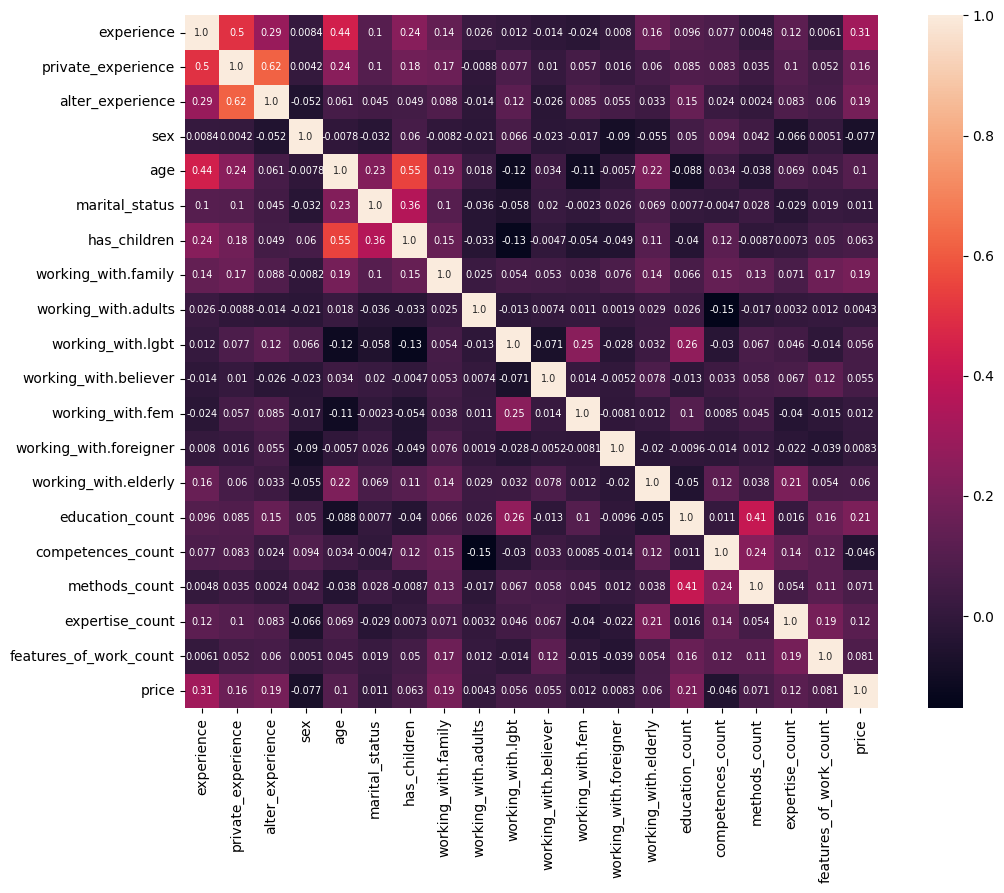

In [21]:
# Создание корреляционной матрицы через heatmap 
correlation_matrix = df_array.drop(["city"], axis=1).corr()
fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(correlation_matrix,square=True, annot=True, fmt=',.2', annot_kws={"size": 7})
plt.savefig('correlation_matrix.png')
plt.show()

In [23]:
#Сохраним как pickle
df_array.to_pickle("./data/alter_psychologists_data_cleaning.pkl")